### Downloading libraries

In [1]:
!pip install torch

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install torchvision

You should consider upgrading via the 'pip install --upgrade pip' command.


### Importing libraries

In [29]:
import pandas as pd

import matplotlib.pyplot as plt

### Loading dataset

In [30]:
advertising_data = pd.read_csv('dataset/Advertising.csv', index_col=0)

advertising_data.sample(10)

,TV,radio,newspaper,sales
4,151.5,41.3,58.5,18.5
52,100.4,9.6,3.6,10.7
104,187.9,17.2,17.9,14.7
76,16.9,43.7,89.4,8.7
170,284.3,10.6,6.4,15.0
167,17.9,37.6,21.6,8.0
9,8.6,2.1,1.0,4.8
47,89.7,9.9,35.7,10.6
151,280.7,13.9,37.0,16.1
102,296.4,36.3,100.9,23.8


In [31]:
advertising_data.shape

(200, 4)

### Scaling the continuous values

In [32]:
from sklearn import preprocessing

In [33]:
advertising_data[['TV']] = preprocessing.scale(advertising_data[['TV']])
advertising_data[['radio']] = preprocessing.scale(advertising_data[['radio']])
advertising_data[['newspaper']] = preprocessing.scale(advertising_data[['newspaper']])

In [34]:
advertising_data.sample(10)

,TV,radio,newspaper,sales
121,-0.067054,0.238763,0.720214,15.5
11,-0.945156,-1.179231,-0.292486,8.6
74,-0.206009,-1.185984,0.034340,11.0
29,1.188210,0.259020,-0.352328,18.9
198,0.349810,-0.942899,-1.111852,12.8
130,-1.021055,-0.760585,0.577515,9.7
33,-0.582005,-1.469583,-0.025502,9.6
78,-0.309934,0.353553,-0.752804,14.2
73,-1.404057,0.657409,-0.518042,8.8
146,-0.078731,-1.442573,-0.992170,10.3


In [35]:
X = advertising_data.drop('sales', axis=1)

Y = advertising_data[['sales']]

#### Split the data into two chunks - 80% for training and 20% for testing 

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
x_train.shape, y_train.shape

((160, 3), (160, 1))

In [38]:
x_test.shape, y_test.shape

((40, 3), (40, 1))

#### Converting data in pytorch tensors

In [39]:
import torch

In [40]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [41]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [42]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 3]), torch.Size([40, 1]))

#### Define the parameters for the neural network
* <b>inp</b> sets the input size to 26 to match the shape of the X_train_tensor. With the one-hot-encoding, we have multiple columns in our X data
* <b>out</b> will be used to set the size of the output from the neural network. We only predict a single price for each car, so this will be 1
* <b>hid</b> is used to set the number of hidden layers in our neural network
* <b>loss_fn</b> is MSELoss since we're performing a linear regression
* <b>learning_rate</b> is set to 0.0001

In [43]:
inp = 3
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

<b>nn.Sequential:</b>
Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

<b>nn.Linear: </b> Applies a linear transformation to the incoming data: y=Ax+b<br>
parameters:<br>
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

#### Creating model using nn.Sequential( )

In [44]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hid, out))

In [46]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

##### Training Model
Foward Pass:
* Predicting Y with input data X

Finding Loss:
* Finding difference between Y_train_tensor and Y_pred using MSEloss function defined above


Back Propogation:
* starting with zero gradients before back propogation
* back propogation is done by simply loss.backward() function

Manually updating model parameters
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* model.parameter() returns all the weights and biases of parameters
* reducing weight with multiple of learning rate and gradient

In [47]:
for iter in range(10000):
    
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    if iter % 1000 ==0:
        print(iter, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

0 235.45156860351562
1000 140.75491333007812
2000 44.37236022949219
3000 11.595548629760742
4000 8.161901473999023
5000 6.197965621948242
6000 4.295080184936523
7000 2.7169392108917236
8000 1.5682175159454346
9000 0.8935233354568481


#### Using our model for predictions
We pick one of the ads from the test data set for prediction of sale

In [48]:
sample = x_test.iloc[14]
sample

TV          -0.824884
radio        0.232011
newspaper   -0.379947
Name: 81, dtype: float64

#### We convert these features to a Pytorch tensor

In [49]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)
sample_tensor

tensor([-0.8249,  0.2320, -0.3799])

#### Compare the actual and predicted sale
The predicted sale is very close to its actual sale

In [50]:
y_pred = model(sample_tensor)

print("Predicted sale : ", int(y_pred.item()))
print("Actual sale : ", int(y_test.iloc[23]))

Predicted sale :  10
Actual sale :  12


#### Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [51]:
y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:5]

tensor([[ 9.8255],
        [ 8.3563],
        [ 8.9333],
        [25.6894],
        [11.7610]], grad_fn=<SliceBackward>)

#### The tensor is converted to a numpy array

In [52]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:5]

array([[ 9.825542 ],
       [ 8.356311 ],
       [ 8.9332695],
       [25.689413 ],
       [11.760996 ]], dtype=float32)

#### Plot a graph of the predicted values against the actual ones 
The good news is there appears to be a strong positive correlation 

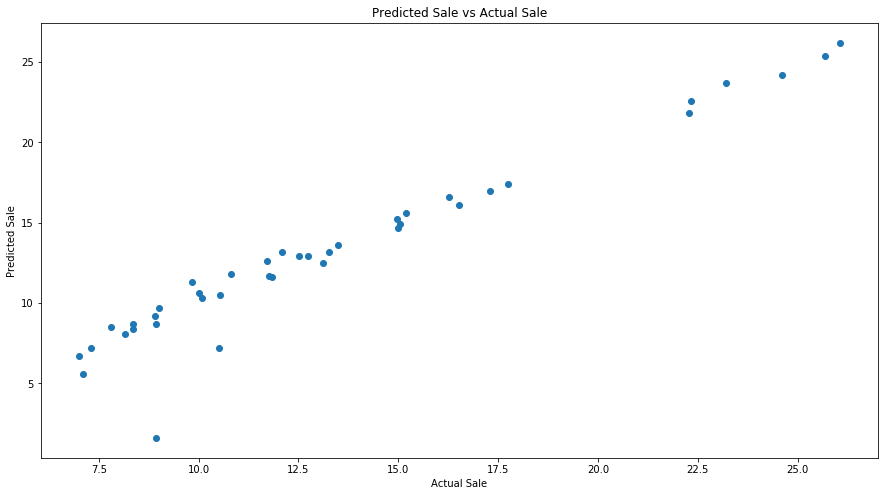

In [53]:
plt.figure(figsize=(15, 8))

plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

In [54]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9394524013318655